In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('boston.csv')

print(df.head())
print(df.info())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-nu

In [3]:
correlation_matrix = df.corr(numeric_only=True)

print("\nКорреляционная матрица:")
print(correlation_matrix.round(2))


Корреляционная матрица:
         CRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX  PTRATIO  \
CRIM     1.00 -0.20   0.41 -0.06  0.42 -0.22  0.35 -0.38  0.63  0.58     0.29   
ZN      -0.20  1.00  -0.53 -0.04 -0.52  0.31 -0.57  0.66 -0.31 -0.31    -0.39   
INDUS    0.41 -0.53   1.00  0.06  0.76 -0.39  0.64 -0.71  0.60  0.72     0.38   
CHAS    -0.06 -0.04   0.06  1.00  0.09  0.09  0.09 -0.10 -0.01 -0.04    -0.12   
NOX      0.42 -0.52   0.76  0.09  1.00 -0.30  0.73 -0.77  0.61  0.67     0.19   
RM      -0.22  0.31  -0.39  0.09 -0.30  1.00 -0.24  0.21 -0.21 -0.29    -0.36   
AGE      0.35 -0.57   0.64  0.09  0.73 -0.24  1.00 -0.75  0.46  0.51     0.26   
DIS     -0.38  0.66  -0.71 -0.10 -0.77  0.21 -0.75  1.00 -0.49 -0.53    -0.23   
RAD      0.63 -0.31   0.60 -0.01  0.61 -0.21  0.46 -0.49  1.00  0.91     0.46   
TAX      0.58 -0.31   0.72 -0.04  0.67 -0.29  0.51 -0.53  0.91  1.00     0.46   
PTRATIO  0.29 -0.39   0.38 -0.12  0.19 -0.36  0.26 -0.23  0.46  0.46     1.00   
B  

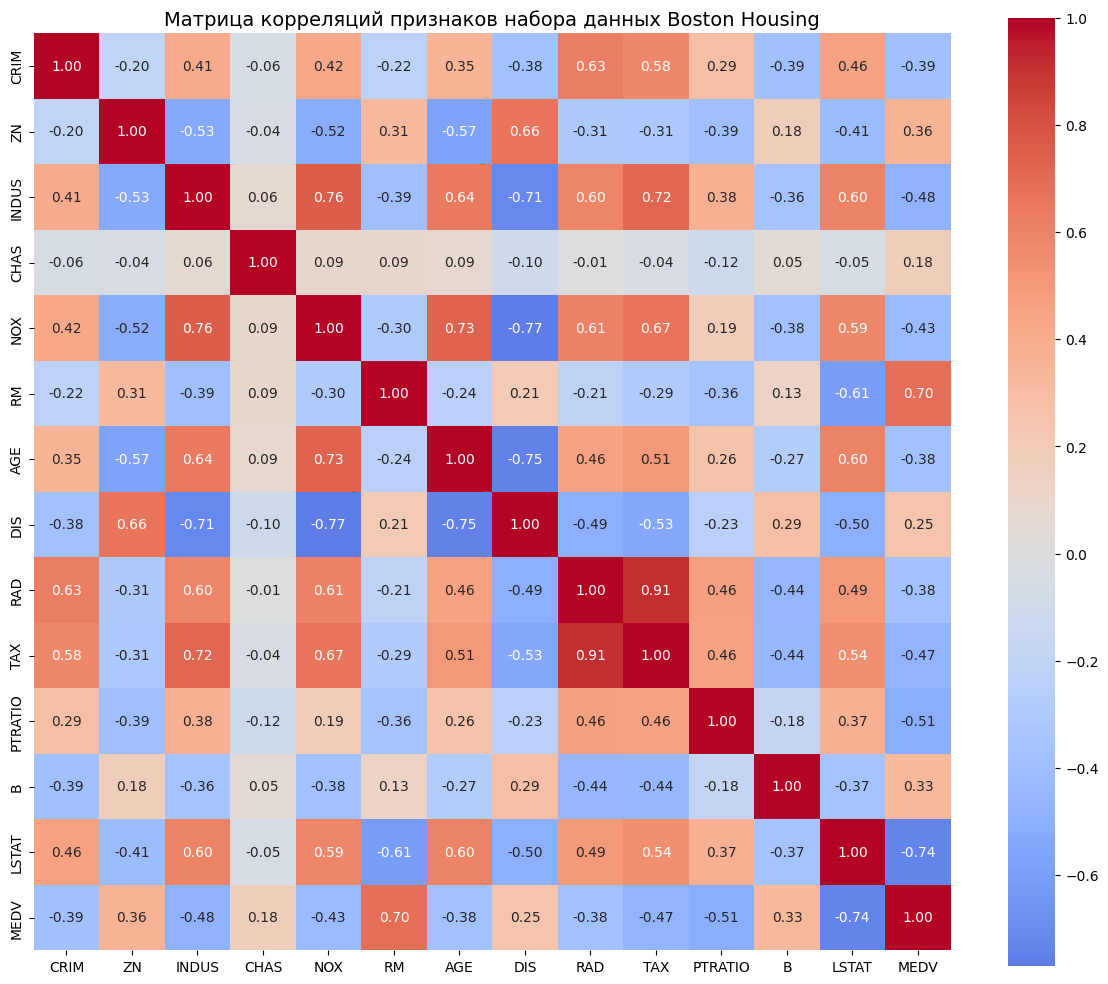

In [4]:
plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            square=True)


plt.title('Матрица корреляций признаков набора данных Boston Housing', fontsize=14)
plt.tight_layout()
plt.show()

In [6]:
target_correlation = correlation_matrix['MEDV'].sort_values(ascending=False)

print("\nКорреляция признаков с ценой (MEDV):")
print(target_correlation)

top_features = target_correlation.abs().sort_values(ascending=False).drop('MEDV').head(5)

print("\nТоп-6 признаков, наиболее сильно коррелирующих с ценой:")
print(top_features)


Корреляция признаков с ценой (MEDV):
MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

Топ-6 признаков, наиболее сильно коррелирующих с ценой:
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
Name: MEDV, dtype: float64


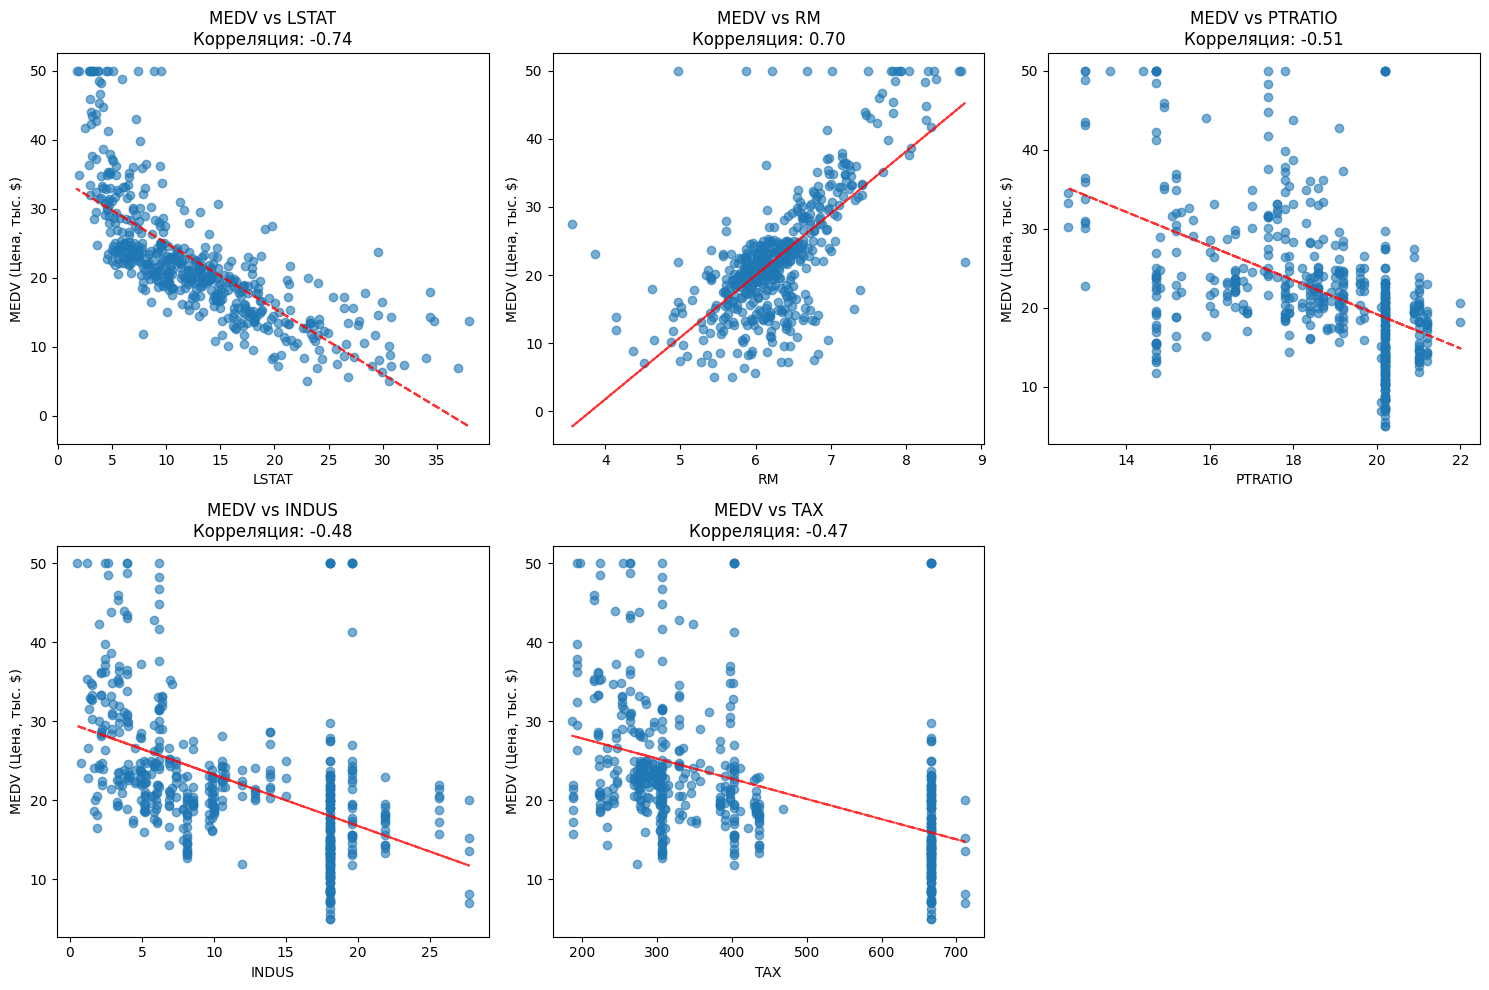

In [8]:

selected_features = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX']


fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(selected_features):
    axes[i].scatter(df[feature], df['MEDV'], alpha=0.6)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('MEDV (Цена, тыс. $)')
    axes[i].set_title(f'MEDV vs {feature}\nКорреляция: {correlation_matrix.loc[feature, "MEDV"]:.2f}')
    
    z = np.polyfit(df[feature], df['MEDV'], 1)
    p = np.poly1d(z)
    axes[i].plot(df[feature], p(df[feature]), "r--", alpha=0.8)

fig.delaxes(axes[5])

plt.tight_layout()
plt.show()


In [9]:
final_features = selected_features

X = df[final_features]
y = df['MEDV']

print(f"Размерность матрицы признаков X: {X.shape}")
print(f"Размерность целевой переменной y: {y.shape}")
print(f"Выбранные признаки: {final_features}")

Размерность матрицы признаков X: (506, 5)
Размерность целевой переменной y: (506,)
Выбранные признаки: ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX']


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

print(f"Обучающая выборка: {X_train.shape[0]}")
print(f"Тестовая выборка: {X_test.shape[0]}")

Обучающая выборка: 404
Тестовая выборка: 102


In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Коэффициенты модели:")
for feature, coef in zip(final_features, model.coef_):
    print(f"  {feature}: {coef:.3f}")
print(f"Свободный член (intercept): {model.intercept_:.3f}")

Коэффициенты модели:
  LSTAT: -0.558
  RM: 5.104
  PTRATIO: -0.794
  INDUS: 0.095
  TAX: -0.005
Свободный член (intercept): 13.048


In [14]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [15]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\nМЕТРИКИ КАЧЕСТВА МОДЕЛИ:")
print("=" * 50)
print(f"Обучающая выборка:")
print(f"  R² (коэффициент детерминации): {r2_train:.4f}")
print(f"  RMSE (корень из MSE): {rmse_train:.4f} тыс. $")

print(f"\nТестовая выборка:")
print(f"  R² (коэффициент детерминации): {r2_test:.4f}")
print(f"  RMSE (корень из MSE): {rmse_test:.4f} тыс. $")

print(f"\nИнтерпретация:")
print(f"Модель объясняет {r2_test*100:.1f}% дисперсии цен на недвижимость в тестовой выборке.")
print(f"Средняя ошибка прогноза составляет {rmse_test:.2f} тыс. $")


МЕТРИКИ КАЧЕСТВА МОДЕЛИ:
Обучающая выборка:
  R² (коэффициент детерминации): 0.6903
  RMSE (корень из MSE): 5.1873 тыс. $

Тестовая выборка:
  R² (коэффициент детерминации): 0.6197
  RMSE (корень из MSE): 5.2812 тыс. $

Интерпретация:
Модель объясняет 62.0% дисперсии цен на недвижимость в тестовой выборке.
Средняя ошибка прогноза составляет 5.28 тыс. $


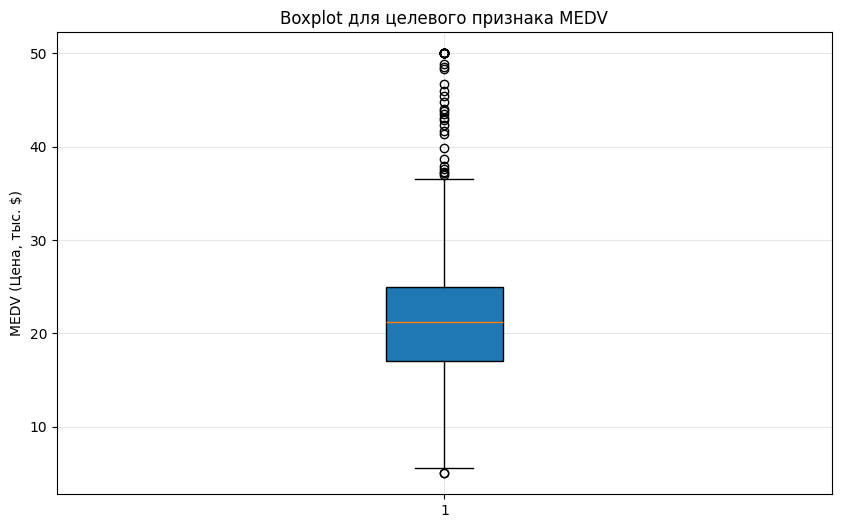

In [17]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['MEDV'], vert=True, patch_artist=True)
plt.title('Boxplot для целевого признака MEDV')
plt.ylabel('MEDV (Цена, тыс. $)')
plt.grid(True, alpha=0.3)
plt.show()

In [18]:

df_filtered = df[df['MEDV'] <= 37.0].copy()

print(f"Исходный размер датасета: {df.shape[0]}")
print(f"Размер датасета после удаления выбросов: {df_filtered.shape[0]}")
print(f"Удалено записей: {df.shape[0] - df_filtered.shape[0]}")

X_filtered = df_filtered[final_features]
y_filtered = df_filtered['MEDV']

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42
)

model_filtered = LinearRegression()
model_filtered.fit(X_train_f, y_train_f)

y_train_pred_f = model_filtered.predict(X_train_f)
y_test_pred_f = model_filtered.predict(X_test_f)

r2_train_f = r2_score(y_train_f, y_train_pred_f)
rmse_train_f = np.sqrt(mean_squared_error(y_train_f, y_train_pred_f))
r2_test_f = r2_score(y_test_f, y_test_pred_f)
rmse_test_f = np.sqrt(mean_squared_error(y_test_f, y_test_pred_f))

print("\nСРАВНЕНИЕ МОДЕЛЕЙ:")
print("=" * 60)
print("ДАННЫЕ С ВЫБРОСАМИ:")
print(f"  R² train: {r2_train:.4f}, R² test: {r2_test:.4f}")
print(f"  RMSE train: {rmse_train:.4f}, RMSE test: {rmse_test:.4f}")

print("\nДАННЫЕ БЕЗ ВЫБРОСОВ:")
print(f"  R² train: {r2_train_f:.4f}, R² test: {r2_test_f:.4f}")
print(f"  RMSE train: {rmse_train_f:.4f}, RMSE test: {rmse_test_f:.4f}")

r2_change = r2_test_f - r2_test
rmse_change = rmse_test_f - rmse_test

print(f"\nИЗМЕНЕНИЯ ПОСЛЕ УДАЛЕНИЯ ВЫБРОСОВ:")
print(f"  ΔR²: {r2_change:+.4f}")
print(f"  ΔRMSE: {rmse_change:+.4f}")

if r2_change > 0:
    print("✓ Качество модели УЛУЧШИЛОСЬ после удаления выбросов")
else:
    print("✗ Качество модели УХУДШИЛОСЬ после удаления выбросов")

Исходный размер датасета: 506
Размер датасета после удаления выбросов: 469
Удалено записей: 37

СРАВНЕНИЕ МОДЕЛЕЙ:
ДАННЫЕ С ВЫБРОСАМИ:
  R² train: 0.6903, R² test: 0.6197
  RMSE train: 5.1873, RMSE test: 5.2812

ДАННЫЕ БЕЗ ВЫБРОСОВ:
  R² train: 0.6904, R² test: 0.7750
  RMSE train: 3.6607, RMSE test: 3.0468

ИЗМЕНЕНИЯ ПОСЛЕ УДАЛЕНИЯ ВЫБРОСОВ:
  ΔR²: +0.1554
  ΔRMSE: -2.2344
✓ Качество модели УЛУЧШИЛОСЬ после удаления выбросов


In [19]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_f)
X_test_scaled = scaler.transform(X_test_f)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train_f)

y_train_pred_ridge = ridge_model.predict(X_train_scaled)
y_test_pred_ridge = ridge_model.predict(X_test_scaled)

r2_train_ridge = r2_score(y_train_f, y_train_pred_ridge)
rmse_train_ridge = np.sqrt(mean_squared_error(y_train_f, y_train_pred_ridge))
r2_test_ridge = r2_score(y_test_f, y_test_pred_ridge)
rmse_test_ridge = np.sqrt(mean_squared_error(y_test_f, y_test_pred_ridge))

print("\nГРЕБНЕВАЯ РЕГРЕССИЯ (Ridge):")
print("=" * 50)
print(f"R² train: {r2_train_ridge:.4f}, R² test: {r2_test_ridge:.4f}")
print(f"RMSE train: {rmse_train_ridge:.4f}, RMSE test: {rmse_test_ridge:.4f}")
print(f"Коэффициенты модели: {ridge_model.coef_}")


ГРЕБНЕВАЯ РЕГРЕССИЯ (Ridge):
R² train: 0.6904, R² test: 0.7747
RMSE train: 3.6607, RMSE test: 3.0488
Коэффициенты модели: [-2.9990545   1.2211282  -1.43120152 -0.51263116 -0.89284052]


In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler()),
    ('linear', LinearRegression())
])

poly_model.fit(X_train_f, y_train_f)

y_train_pred_poly = poly_model.predict(X_train_f)
y_test_pred_poly = poly_model.predict(X_test_f)

r2_train_poly = r2_score(y_train_f, y_train_pred_poly)
rmse_train_poly = np.sqrt(mean_squared_error(y_train_f, y_train_pred_poly))
r2_test_poly = r2_score(y_test_f, y_test_pred_poly)
rmse_test_poly = np.sqrt(mean_squared_error(y_test_f, y_test_pred_poly))

print("\nПОЛИНОМИАЛЬНАЯ РЕГРЕССИЯ (3-я степень):")
print("=" * 50)
print(f"R² train: {r2_train_poly:.4f}, R² test: {r2_test_poly:.4f}")
print(f"RMSE train: {rmse_train_poly:.4f}, RMSE test: {rmse_test_poly:.4f}")

# Анализ переобучения
overfitting_gap_poly = r2_train_poly - r2_test_poly
print(f"Разрыв между train и test R²: {overfitting_gap_poly:.4f}")


ПОЛИНОМИАЛЬНАЯ РЕГРЕССИЯ (3-я степень):
R² train: 0.8362, R² test: 0.8824
RMSE train: 2.6624, RMSE test: 2.2032
Разрыв между train и test R²: -0.0461



СВОДНОЕ СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ:
                       Модель  R² Train  R² Test  RMSE Train  RMSE Test
0      Линейная (с выбросами)    0.6903   0.6197      5.1873     5.2812
1     Линейная (без выбросов)    0.6904   0.7750      3.6607     3.0468
2           Гребневая (Ridge)    0.6904   0.7747      3.6607     3.0488
3  Полиномиальная (3 степени)    0.8362   0.8824      2.6624     2.2032


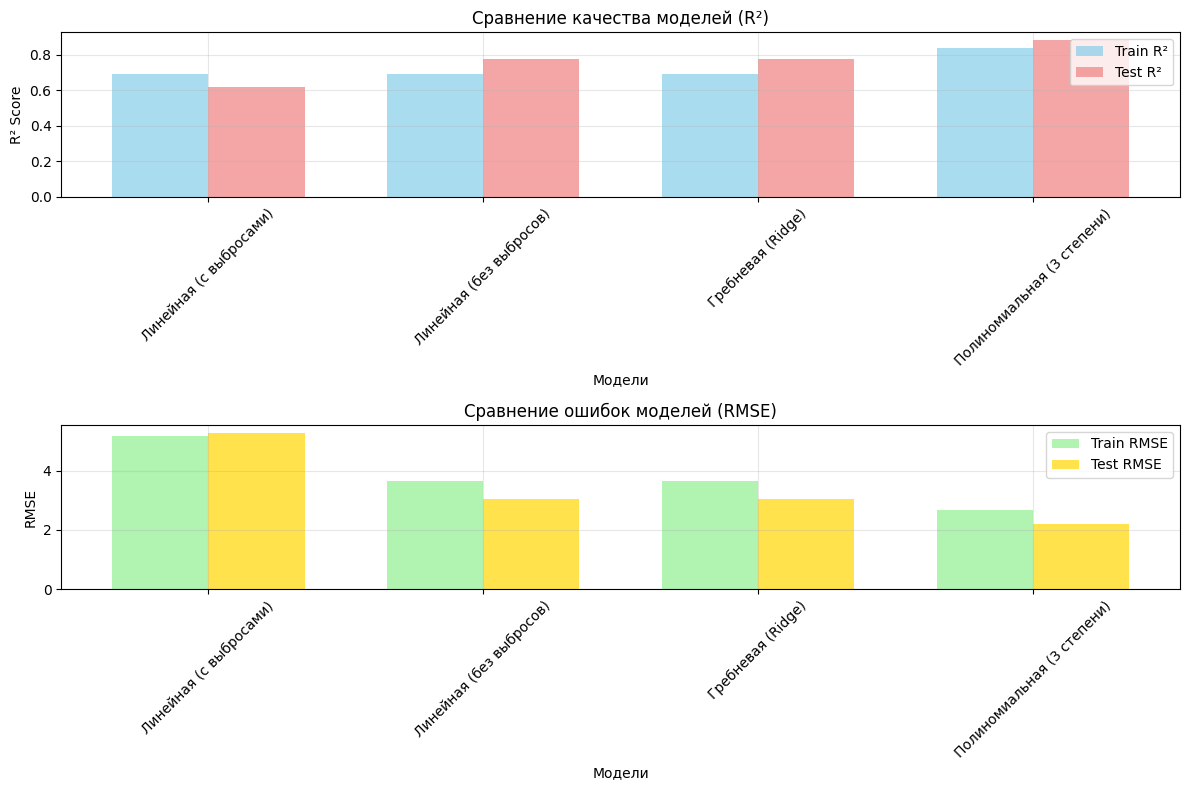


АНАЛИЗ РЕЗУЛЬТАТОВ:
Лучшая модель по R² test: Полиномиальная (3 степени) (R² = 0.8824)
Лучшая модель по RMSE test: Полиномиальная (3 степени) (RMSE = 2.2032)


In [22]:
results_comparison = pd.DataFrame({
    'Модель': ['Линейная (с выбросами)', 'Линейная (без выбросов)', 
               'Гребневая (Ridge)', 'Полиномиальная (3 степени)'],
    'R² Train': [r2_train, r2_train_f, r2_train_ridge, r2_train_poly],
    'R² Test': [r2_test, r2_test_f, r2_test_ridge, r2_test_poly],
    'RMSE Train': [rmse_train, rmse_train_f, rmse_train_ridge, rmse_train_poly],
    'RMSE Test': [rmse_test, rmse_test_f, rmse_test_ridge, rmse_test_poly]
})

print("\nСВОДНОЕ СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ:")
print("=" * 80)
print(results_comparison.round(4))

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
models = results_comparison['Модель']
x_pos = np.arange(len(models))
width = 0.35

plt.bar(x_pos - width/2, results_comparison['R² Train'], width, 
        label='Train R²', alpha=0.7, color='skyblue')
plt.bar(x_pos + width/2, results_comparison['R² Test'], width, 
        label='Test R²', alpha=0.7, color='lightcoral')

plt.xlabel('Модели')
plt.ylabel('R² Score')
plt.title('Сравнение качества моделей (R²)')
plt.xticks(x_pos, models, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.bar(x_pos - width/2, results_comparison['RMSE Train'], width, 
        label='Train RMSE', alpha=0.7, color='lightgreen')
plt.bar(x_pos + width/2, results_comparison['RMSE Test'], width, 
        label='Test RMSE', alpha=0.7, color='gold')

plt.xlabel('Модели')
plt.ylabel('RMSE')
plt.title('Сравнение ошибок моделей (RMSE)')
plt.xticks(x_pos, models, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nАНАЛИЗ РЕЗУЛЬТАТОВ:")
print("=" * 50)

best_test_r2 = results_comparison.loc[results_comparison['R² Test'].idxmax()]
best_test_rmse = results_comparison.loc[results_comparison['RMSE Test'].idxmin()]

print(f"Лучшая модель по R² test: {best_test_r2['Модель']} (R² = {best_test_r2['R² Test']:.4f})")
print(f"Лучшая модель по RMSE test: {best_test_rmse['Модель']} (RMSE = {best_test_rmse['RMSE Test']:.4f})")